## Bike Sharing Case Study

#### Problem Statement:
A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.So to accelerate its revenue as soon as the ongoing lockdown comes to an end, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

#### Steps we will perform:

1. Reading, understanding and visualing the data
2. Preparing the data for modelling (train-test split, rescaling etc)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

## Step-1: Reading and Understanding the data

### Import necessary python libraries to deal with data understanding and visualisation, Later we will add more libraries when we need in actual

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load the dataset for Bike Sharing

In [2]:
bikesharing = pd.read_csv('day.csv')
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Check how many records are in the dataset

In [3]:
bikesharing.shape

(730, 16)

### Check whether there is any missing value in the dataset or not

As per **info()** method output, it is clearly showing that:
  - There is no missing value in any column as we have equal count for each column

In [4]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Describe about the bikesharing dataset

In [5]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### We need to drop `instant` and `dteday` variables as they are of no use for model building

In [6]:
bikesharing = bikesharing.drop(['instant','dteday'], axis=1)

#### If we combine `casual` and `register` variables, it creates `cnt` target variable, So we can drop these two also.

In [7]:
bikesharing = bikesharing.drop(['casual','registered'], axis=1)

## Step-2: Preparing the data for Modelling

### There are some features or variables:
    
   - In which data should be categorical, but they have numeric data which is not understandable
   - So better to convert that numeric data into categorical data as per the given data dictionary
   - Those columns are :
         - Season
         - Weekday
         - Month
         - WeatherSituation
   - I have created 4 methods for mapping these into their corresponding category.

### Methods and their mapping for conversion of Numeric to Categorical data

In [8]:
def season_map(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

def week_map(x):
    return x.map({6:'Mon',0:'Tue',1:'Wed',2:'Thur',3:'Fri',4:'Sat',5:'Sun'})

def month_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

def weathersit_map(x):
    return x.map({1:'Clear',2:'Mist',3:'LightSnow',4:'HeavyRain'})

In [9]:
bikesharing[['season']] = bikesharing[['season']].apply(season_map)

In [10]:
bikesharing[['weekday']] = bikesharing[['weekday']].apply(week_map)

In [11]:
bikesharing[['mnth']] = bikesharing[['mnth']].apply(month_map)

In [12]:
bikesharing[['weathersit']] = bikesharing[['weathersit']].apply(weathersit_map)

### Verify the conversion

In [13]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### DataVisualisation

Now lets plot for all the variables in a single frame for visualisation

   - By plotting **`Pair plot`** we found that there is **`+ve relation`** of target variable **`cnt`** with 
          1. temp
          2. atemp
   - I have taken only **`Continuous Variables`**

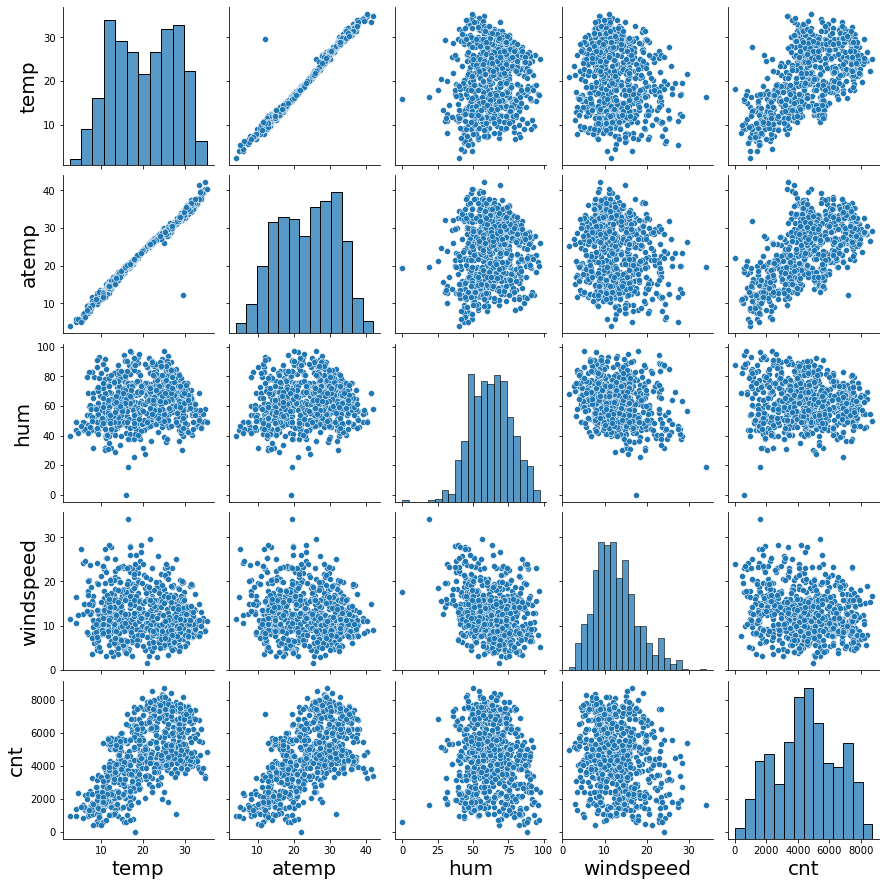

In [14]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(bikesharing[num_vars])

#### We will also plot Heatmap for above selected continuous variables

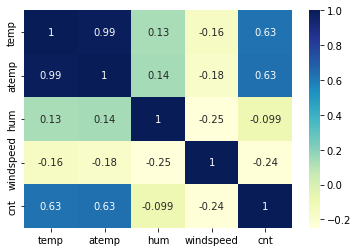

In [15]:
sns.heatmap(bikesharing[num_vars].corr(),annot=True, cmap='YlGnBu')
plt.show()

#### After plotting Heatmap we can see that :
 - Two variables `temp` and `atemp` having same `Correlation Value`
 - Also same `Coefficient Value` against the target variable `cnt`
 - It creates Multicollinearity
 - So We can drop one of them, I am dropping `atemp` variable

In [16]:
bikesharing = bikesharing.drop(['atemp'], axis=1)

In [17]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Visualising Categorical Variables

Some observations after plotting Boxplots for Categorical Variables:
 - For `Season` variable:
     - There is high demand for bike sharing in `Fall/Raining` season
     - Very Low demand in `Spring` season as compare to others
 - For `Year` variable:
     - In 2019 demand is high as compare to 2018
 - For `Month` variable:
     - August and September are pretty significant than other
 - For `Holiday`,`Weekday` and `Workingday`:
     - There is nothing much to say
     - No hikes
 - For `WeatherSituation` variable:
     - When weather is `clear`, demand raises
     - When weather is `LightSnow`, demand falls

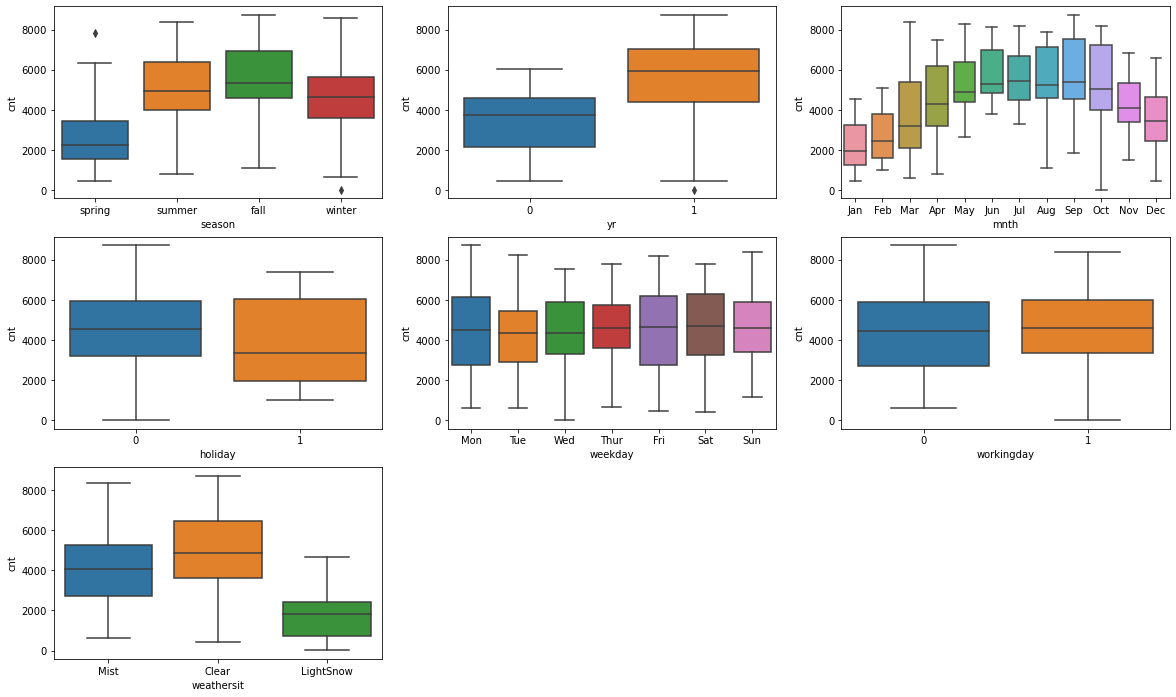

In [18]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikesharing)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bikesharing)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bikesharing)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bikesharing)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bikesharing)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bikesharing)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bikesharing)
plt.show()

#### We can also plot bar chart for the categorical variables

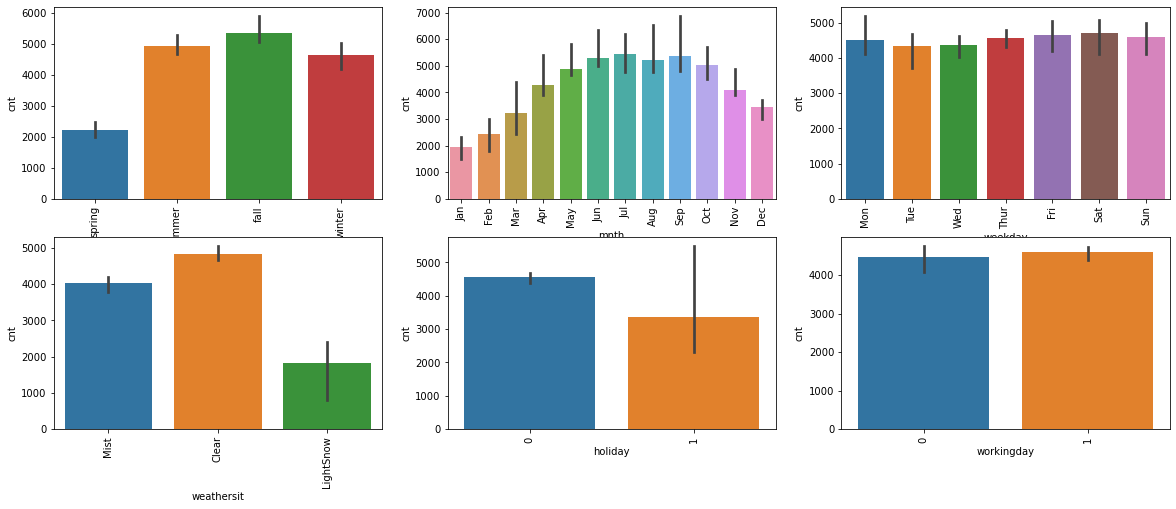

In [19]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
plt.xticks(rotation=90)
sns.barplot(x=bikesharing['season'],y=bikesharing['cnt'],estimator=np.median)
plt.subplot(3,3,2)
plt.xticks(rotation=90)
sns.barplot(x=bikesharing['mnth'],y=bikesharing['cnt'],estimator=np.median)
plt.subplot(3,3,3)
plt.xticks(rotation=90)
sns.barplot(x=bikesharing['weekday'],y=bikesharing['cnt'],estimator=np.median)
plt.subplot(3,3,4)
plt.xticks(rotation=90)
sns.barplot(x=bikesharing['weathersit'],y=bikesharing['cnt'],estimator=np.median)
plt.subplot(3,3,5)
plt.xticks(rotation=90)
sns.barplot(x=bikesharing['holiday'],y=bikesharing['cnt'],estimator=np.median)
plt.subplot(3,3,6)
plt.xticks(rotation=90)
sns.barplot(x=bikesharing['workingday'],y=bikesharing['cnt'],estimator=np.median)
plt.show()

### Insight from above Bar graph :
 - Bike sharing demand is very less for `weathersit_LightSnow`
 - Bike sharing demand is very low for `Season_Spring`

#### Now plotting Heatmap among all the variables of Bikesharing dataset, to check `Correlation`

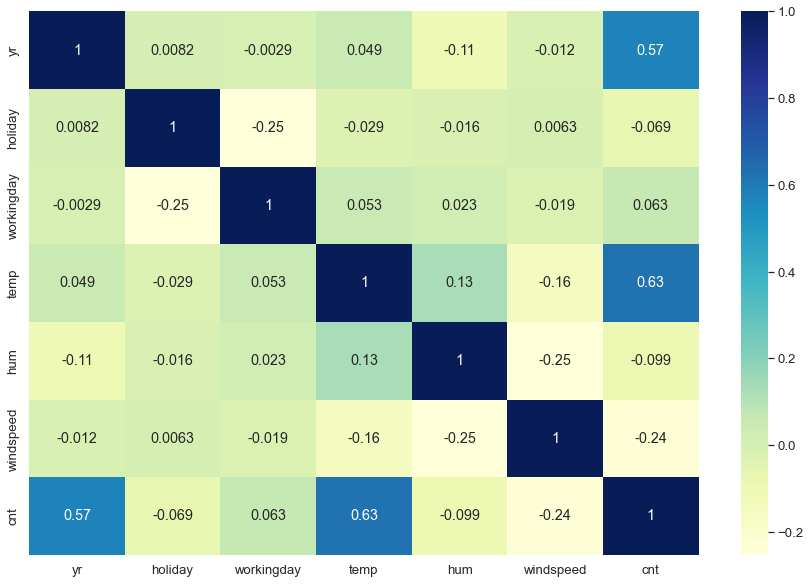

In [20]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.heatmap(bikesharing.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Dummy Variables

As now we need to build a model, So We need to create dummy vaiables for:
   - Categorical Variables :
       - `season`
       - `mnth`
       - `weekday`
       - `weathersit`

We will use inbuilt function from `Pandas` library : `get_dummy()`

In [21]:
dummy_vars = ['season','mnth','weekday','weathersit']
dummy = pd.get_dummies(bikesharing[dummy_vars],drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Now dropping the Categorical variables which are converted into dummy variables

In [22]:
bikesharing = bikesharing.drop(dummy_vars, axis=1)

#### Concat created `dummy variables` into `bikesharing` dataset horizontally

In [23]:
bikesharing = pd.concat([bikesharing, dummy], axis=1)

## Splitting BikeSharing dataset into train and test

#### Now after doing all data manipulation like `Dummy Variables creation` , `Drop Unnecessary Variables` etc, We have perfect dataset for build model. We will split our dataset into `train` and `test`:
 - `train` dataset upon which we will build our model
 - `test` dataset upon which we will evaluate our build model
 
I have splitted bikesharing dataset into 70-30% for `train` and `test` data.

In [24]:
from sklearn.model_selection import train_test_split

bikeshare_train, bikeshare_test = train_test_split(bikesharing, train_size=0.7, random_state=100)

In [25]:
print(bikeshare_train.shape)
print(bikeshare_test.shape)

(510, 29)
(220, 29)


## Re-Scaling the Features

#### As in Bikesharing dataset, there are some variables like `temp`,`hum`,`windspeed` and `cnt` having large integer values as compare to other variables (having small integer values), So it is important to rescale the variables for having comparable scale. If we don't have comparable scale then some of the coefficients as obtained by fitting regression model might be very large or very small as compared to other coefficients. So it is must to use `Standardization` or `Normalization` to have units of coefficients are on same scale.

#### There are two common ways of rescaling:
   - Standardization (mean = 0, sigma =1)
   - Min-Max Scaling (rescale 0 to 1)
   
#### I am going to use Min-Max scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scale_vars = ['temp','hum','windspeed','cnt']

bikeshare_train[scale_vars] = scaler.fit_transform(bikeshare_train[scale_vars])
bikeshare_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
bikeshare_train[scale_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


## Step-3: Training the Model

#### Till now I come across three ways to train model:
   - Bottom-Up approach (Start from adding single feature and then adding one-by-one other features)
   - Add all variables into model at once and then remove insignificant features one-by-one
   - RFE (Select n number of features and figure out the significant features out of them)
   
#### There are many variables in bikesharing dataset so it is impossible to train model by using first two ways, So RFE is best fit way here to train the model

### Build Model using RFE

As we have multiple features for selection so we will use RFE here to select features.

In [28]:
bikeshare_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

### Create X and y from the train dataset
 - X = Independent Feature/s
 - y = Dependent Target Feature

In [29]:
y_train = bikeshare_train.pop('cnt')
X_train = bikeshare_train

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### In RFE, we need to pass number of features in method, which then returns:
  - **`rfe.support_`** (boolean True/False)
  - **`rfe.ranking_`** (ranking of each feature)
  
I tried `n_features_to_select` 25, 20, 18 respectively. At the end I got my significant variables with `n_features_to_select = 14`

In [31]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=14)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', False, 12),
 ('weekday_Thur', False, 11),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 10),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

#### Below columns having rank 1 means significant against target variables using RFE

In [33]:
supported_col = X_train.columns[rfe.support_]
supported_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon',
       'weekday_Tue', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

#### Rest of the columns we can leave as they might be less significant

In [34]:
not_supported_col = X_train.columns[~rfe.support_]
not_supported_col

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Wed'],
      dtype='object')

## Building Model using StatsModels, for the detailed statistics

As of now I come across two libraries for building the model:
 - StatsModels
 - Sklearn (SciKit Learn)
 
Difference between them is, in `Statsmodels` we have facility of getting statistics of model whereas in `Sklearn` we don't have this kind of facility. So as per the condition we can choose any of them. I have seleced the `Statsmodels`.

### Creating X_train dataframe with RFE supported variables

In [35]:
X_train_rfe = X_train[supported_col]

In [36]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon',
       'weekday_Tue', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

#### In `StatsModels` it doesn't provide `intercept` value that is `c` in `y = mx+c`, So we have to add constant variable implicitly.
#### After adding constant variable, using OLS method I have fit model and print summary

In [37]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          9.38e-190
Time:                        16:37:01   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2435      0.025      9.653      0.000       0.194       0.293
yr                       0.2308      0.008     28.455      0.000       0.215       0.247
holiday                 -0.0080      0.021     -0.374      0.709      -0.050       0.034
workingday               0.0948      0.009     10.227      0.000       0.077       0.113
temp                     0.4776      0.031     15.613      0.000       0.418       0.538
hum                     -0.1482      0.038     -3.938      0.000      -0.222      -0.074
windspeed               -0.1687      0.025     -6.616      0.000      -0.219      -0.119
season_spring           -0.1080      0.015     -7.280      0.000      -0.137      -0.079
season_winter            0.0558      0.012      4.528      0.000       0.032       0.080
mnth_Jul                -0.0782      0.017     -4.571      0.000      -0.112      -0.045
mnth_Sep                 0.0591      0.015      3.829      0.000       0.029       0.089
weekday_Mon              0.1046      0.011      9.177      0.000       0.082       0.127
weekday_Tue              0.0521      0.012      4.349      0.000       0.029       0.076
weathersit_LightSnow    -0.2499      0.026     -9.482      0.000      -0.302      -0.198
weathersit_Mist         -0.0578      0.011     -5.501      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       60.956   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.410
Skew:                          -0.606   Prob(JB):                     1.09e-34
Kurtosis:                       5.427   Cond. No.                     1.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.76e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Summary Analysis :

 - p-value should be less than 0.05, considered good for predicting the model.
 - R-squared value should be near to 1 treated as significant for overall model.
 - Adjusted R-squared value also should be high for significant.
 - High F-statistics and Low Prob. F-statistics is good for model.
 
### Variables selection/rejection :

 - High p value, High VIF (No grainer) , High p value means less significance (Drop this)
 - High Low case :
       - High p , Low VIF : Remove these first
       - Low p , High VIF : Remove these after removed above
 - Both LOW ( We can keep it )


#### As per summary, it is clear that `holiday` variable is not much significant due to very high `p-value`. So I have dropped this variable.

In [38]:
X_train_new = X_train_rfe.drop(['holiday'], axis=1)
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon',
       'weekday_Tue', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

#### After dropping `holiday` variable, I have repeated the add constant and model fit steps until I don't have any high p-value variable.

In [39]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          9.38e-190
Time:                        16:37:01   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2355 

#### Now I have features having p-value less than 0.05, after this I also need to calculate VIF to check how a feature is related to other features

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
0,const,99.60
2,workingday,9.07
10,weekday_Mon,6.06
11,weekday_Tue,5.74
3,temp,2.99
6,season_spring,2.55
4,hum,1.89
7,season_winter,1.78
13,weathersit_Mist,1.57
8,mnth_Jul,1.30


#### Dropping `const` variable

In [41]:
X_train_new = X_train_new.drop(['const'],axis=1)

#### Calculating the VIFs again for the model

In [42]:
vif = pd.DataFrame()
X = X_train_new
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
3,hum,29.19
2,temp,17.25
1,workingday,16.91
9,weekday_Mon,4.57
4,windspeed,4.52
10,weekday_Tue,4.45
5,season_spring,2.79
12,weathersit_Mist,2.28
6,season_winter,2.14
0,yr,2.08


#### The common hueristic for VIF values is:
 - VIF > 10 , definitely high VIF value and variable should be eliminated
 - VIF > 5 , can be okay but it is worth inspecting
 - VIF < 5, good VIF value, no need to eliminate this variable
 
So, first I have removed only one variable having VIF > 5 that is `hum`

In [43]:
X_train_new =X_train_new.drop(['hum'],axis=1)
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon', 'weekday_Tue',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

#### Again add constant and fit the model

In [44]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.3
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          1.26e-187
Time:                        16:37:01   Log-Likelihood:                 503.06
No. Observations:                 510   AIC:                            -980.1
Df Residuals:                     497   BIC:                            -925.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1553 

#### Calculate VIFs for the new model

In [45]:
vif = pd.DataFrame()
X = X_train_new
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,workingday,13.12
2,temp,12.38
3,windspeed,4.48
8,weekday_Mon,3.77
9,weekday_Tue,3.54
4,season_spring,2.44
0,yr,2.07
5,season_winter,1.78
11,weathersit_Mist,1.58
6,mnth_Jul,1.37


#### Now we have `workingday` having high VIF value, so need to drop this feature

In [46]:
X_train_new =X_train_new.drop(['workingday'],axis=1)
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mon', 'weekday_Tue', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

#### Add constant and fit the model

In [47]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          1.84e-185
Time:                        16:37:01   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2558 

#### This time we have one feature having high p-value that is `weekday_Mon`, we need to drop this

In [48]:
X_train_new =X_train_new.drop(['weekday_Mon'],axis=1)
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Tue', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

#### Repeating process of add constant and fit the model

In [49]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          2.75e-186
Time:                        16:37:01   Log-Likelihood:                 494.20
No. Observations:                 510   AIC:                            -966.4
Df Residuals:                     499   BIC:                            -919.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2586 

## Now we have low p-value for all features, so time to check VIF values

### So, finally I have features having VIF < 5. I can say below mentioned features are significant for our model.

In [50]:
vif = pd.DataFrame()
X = X_train_new
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,season_spring,1.64
9,weathersit_Mist,1.52
4,season_winter,1.40
5,mnth_Jul,1.35
6,mnth_Sep,1.20
7,weekday_Tue,1.17
8,weathersit_LightSnow,1.08


In [51]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Tue', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

### Now we will try to add some more features from `rfe_not_supported` features

In [52]:
not_supported_col

Index(['season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Wed'],
      dtype='object')

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', False, 12),
 ('weekday_Thur', False, 11),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 10),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

### This time we will take `Rank 2` features as `Rank 1` we have already checked.

#### We have only one feature for Rank 2 that is `season_summer` :
   - so try to add this feature into the fit model
   - to check whether it improves our model or not

In [54]:
X_train_new['season_summer'] = X_train['season_summer']
X_train_new.head()

,yr,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weekday_Tue,weathersit_LightSnow,weathersit_Mist,season_summer
576,1,0.815169,0.264686,0,0,1,0,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,1,0
728,1,0.245101,0.663106,1,0,0,0,1,0,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,1,1
111,0,0.345824,0.380981,0,0,0,0,0,0,1,1


In [55]:
X_train_rfe_sm = sm.add_constant(X_train_new)
lr_model = sm.OLS(y_train,X_train_rfe_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          3.37e-187
Time:                        16:37:02   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2034      0.030      6.877      0.000       0.145       0.261
yr                       0.2339      0.008     28.414      0.000       0.218       0.250
temp                     0.4917      0.033     14.805      0.000       0.426       0.557
windspeed               -0.1497      0.025     -5.963      0.000      -0.199      -0.100
season_spring           -0.0682      0.021     -3.227      0.001      -0.110      -0.027
season_winter            0.0818      0.017      4.739      0.000       0.048       0.116
mnth_Jul                -0.0483      0.019     -2.587      0.010      -0.085      -0.012
mnth_Sep                 0.0723      0.017      4.260      0.000       0.039       0.106
weekday_Tue             -0.0450      0.012     -3.847      0.000      -0.068      -0.022
weathersit_LightSnow    -0.2847      0.025    -11.513      0.000      -0.333      -0.236
weathersit_Mist         -0.0802      0.009     -9.161      0.000      -0.097      -0.063
season_summer            0.0479      0.015      3.145      0.002       0.018       0.078
==============================================================================
Omnibus:                       75.768   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.623
Skew:                          -0.732   Prob(JB):                     3.69e-45
Kurtosis:                       5.736   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif = pd.DataFrame()
vif['feature'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i ) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF',ascending=False)
vif

,feature,VIF
1,temp,5.14
2,windspeed,4.60
10,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
4,season_winter,1.80
5,mnth_Jul,1.59
9,weathersit_Mist,1.55
6,mnth_Sep,1.33
7,weekday_Tue,1.17


### Analysis of adding new feature:
   - When we add `season_summer` feature into model then :
    - Although p-value for this feature didn't increase but VIF for `temp` increased
   - And there is no much increase in R-squared value
   - The idea of adding this feature is not very significant for the model
  
### Better we need to drop this feature.

In [57]:
X_train_new = X_train_new.drop(['season_summer'], axis=1)

In [58]:
X_train_new

,yr,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weekday_Tue,weathersit_LightSnow,weathersit_Mist
576,1,0.815169,0.264686,0,0,1,0,0,0,0
426,1,0.442393,0.255342,1,0,0,0,0,0,1
728,1,0.245101,0.663106,1,0,0,0,1,0,0
482,1,0.395666,0.188475,0,0,0,0,0,0,1
111,0,0.345824,0.380981,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
578,1,0.863973,0.187140,0,0,0,0,0,0,0
53,0,0.202618,0.111379,1,0,0,0,0,0,0
350,0,0.248216,0.431816,0,1,0,0,0,0,1
79,0,0.462664,0.529881,0,0,0,0,0,0,1


In [59]:
vif = pd.DataFrame()
X = X_train_new
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Feature,VIF
1,temp,4.67
2,windspeed,4.00
0,yr,2.06
3,season_spring,1.64
9,weathersit_Mist,1.52
4,season_winter,1.40
5,mnth_Jul,1.35
6,mnth_Sep,1.20
7,weekday_Tue,1.17
8,weathersit_LightSnow,1.08


### So as we don't have any other feature of `Rank 2` and we can't add features having rank more than 2 because it won't good for our model.

### So our final features for model fit are :
 - temp
 - windspeed
 - yr (year)
 - season_spring
 - weathersit_Mist
 - season_winter
 - mnth_Jul
 - mnth_Sep
 - weekday_Tue
 - weathersit_LightSnow

## Residual Analysis of the train data

#### So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [60]:
y_train_pred = lm.predict(X_train_lm)

#### From below plotted graph it is clearly visible that one of the assumption has proved that is Residual errors should be normally distributed.

We will plot histogram of the error terms.

We can say that Residual error terms are normally distributed, mean is equal to 0.

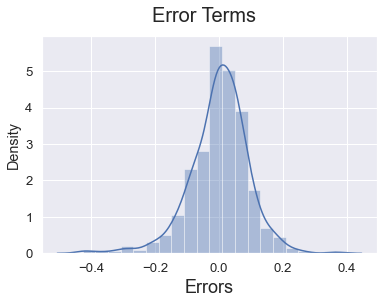

In [61]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

### If we looking for patterns in residuals then as per assumption we shouldn't be able to identify the pattern.

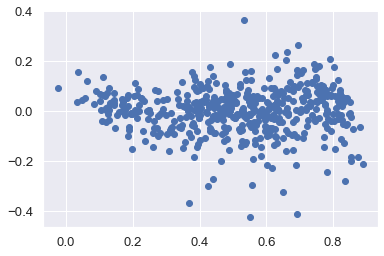

In [74]:
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.show()

## Making Prediction

### Applying the scaling on the test sets

Before making prediction on test dataset, need to scale the test dataset as well.

In [62]:
scale_vars = ['temp','hum','windspeed','cnt']
bikeshare_test[scale_vars] = scaler.transform(bikeshare_test[scale_vars])

In [63]:
bikeshare_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
bikeshare_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

Now from bikesharing testing dataset I have divided data into X_test and y_test

In [65]:
y_test = bikeshare_test.pop('cnt')
X_test = bikeshare_test

#### Now let's use our model to make predictions.
#### Creating `X_test_new` dataframe by dropping `X_train_new` variables from `X_test`
#### And adding a constant variable

In [66]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new

,const,yr,temp,windspeed,season_spring,season_winter,mnth_Jul,mnth_Sep,weekday_Tue,weathersit_LightSnow,weathersit_Mist
184,1.0,0,0.831783,0.084219,0,0,1,0,0,0,1
535,1.0,1,0.901354,0.153728,0,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,1,0,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
702,1.0,1,0.519232,0.283397,0,1,0,0,0,0,0
127,1.0,0,0.584649,0.069510,0,0,0,0,1,0,0
640,1.0,1,0.745598,0.052115,0,1,0,0,0,0,1
72,1.0,0,0.331557,0.203418,1,0,0,0,0,0,0


#### Predict the model based on `X_test_new` to get `y_test_pred`.
#### I used `predict()` method here.

In [67]:
y_test_pred = lm.predict(X_test_new)

## Model Evaluation

Now we have both `y_test` and `y_test_pred`, so we can plot a scatter plot between them and can see the distribution.
From the distribution between `y_test` and `y_test_pred` we can say that there is a linear relationship and most of variance explained by our linear model.

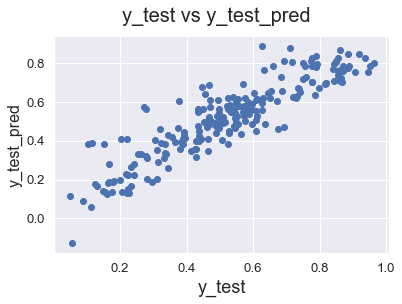

In [68]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

#### Also we can calculate r2_scroe of (`y_train`, `y_train_pred`) and (`y_test`, `y_test_pred`)

We have r2_score of :
 - y_train and y_train_pred : 0.83
 - y_test and y_test_pred : 0.80

So difference is not much so we can say that model is good fit and overall significant.

In [69]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

r2_score_test = r2_score(y_test, y_test_pred)
print('Train set Adjusted R-square: ',lm.rsquared_adj)

0.8322849355208716
0.8091992919519854
Train set Adjusted R-square:  0.8289239121846165


In [70]:
N = len(X_test)

finalVar = list(lm.params.index)
finalVar.remove('const')
predictor_count = len(finalVar)

r2_test_adj = 1 - ((1-r2_score_test)*(N-1))/(N-predictor_count-1)
r2_test_adj

0.8000700714712191

## Significant features to predict the demand for bike-sharing :

 - yr (year)
 - temp
 - Season (spring and winter)
 - Month (July and September)
 - Weekday (Tuesday)
 - WeatherSit (LightSnow and Mist)
 - Windspeed

In [71]:
print("Coefficent for the variables are define here ")
print(round(lm.params,3))

Coefficent for the variables are define here 
const                   0.259
yr                      0.235
temp                    0.449
windspeed              -0.141
season_spring          -0.115
season_winter           0.044
mnth_Jul               -0.070
mnth_Sep                0.052
weekday_Tue            -0.044
weathersit_LightSnow   -0.286
weathersit_Mist        -0.080
dtype: float64


## Equation for our best fitted line is :

#### cnt = 0.259 + (0.235 yr) + (0.449 temp) - (0.141 windspeed) - (0.115 season_spring) + (0.044 season_winter) - (0.070 mnth_Jul) + (0.052 mnth_Sep) - (0.044 weekday_Tue) - (0.286 weathersit_LightSnow) -(0.080 weathersit_Mist)

### Coefficients of the variable will explain the factor effecting the bike demand.

### Train Set R2-Score is : 0.8322849355208716
### Test Set R2-Score is : 0.8091992919519854

### Train Set Adj. R2-Score is : 0.8289239121846165
### Test Set Adj. R2-Score is : 0.8000700714712191

#### From above metrics of R-Score and Adj. R2-Score of Train and Test data set :
   - Both explain more than 80% of bike sharing demand
   - So our overall model with selected features is significant
   
#### Top 3 features which explaining the demand of bike sharing:
 - yr (year) : Positive Correlation
 - temp : Positive Correlation
 - weathersit(LightSnow and Mist) : Negative Correlation
 
 

## Thank You :)